# Imports and Reading CSV

In [2]:
!pip install cenpy
!pip install python-Levenshtein

In [3]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [4]:
from cenpy import products
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [5]:
# Merge csvs

In [6]:
import pandas

In [7]:
import geopandas

In [8]:
from pylab import rcParams
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

In [9]:
from platform import python_version

In [10]:
cdc_cali = pandas.read_csv("cdc_cali.csv")
cdc_l    = pandas.read_csv("cdc_l.csv")
census_cali = geopandas.read_file('census_cali.gpkg')
census_l    = geopandas.read_file('census_l.gpkg')

In [11]:
# Clean up
cdc_cali = cdc_cali.drop(columns=["Unnamed: 0"])
cdc_l = cdc_l.drop(columns=["Unnamed: 0"])

In [12]:
# Check
len(cdc_cali) == len(census_cali) and len(cdc_l) == len(census_l)

True

In [13]:
pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install esda

In [15]:
pip install libpysal

Note: you may need to restart the kernel to use updated packages.


In [16]:
from esda.moran import Moran
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN
import seaborn
import pandas
import geopandas
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# Merge

In [17]:
# merge pre
### Add leading zeros to fips column credit: chatGPT
def add_leading_zeros(fips):
    # Convert the float FIPS code to an integer
    fips_int = int(fips)
    # Convert it to a string, remove decimal point and any trailing digits, then add leading zeros
    fips_without_decimal = str(fips_int).split('.')[0]
    return fips_without_decimal.zfill(5)
cdc_cali['County_FIPS'] = cdc_cali['County_FIPS'].apply(add_leading_zeros)

In [18]:
cdc_l['County_FIPS'] = cdc_l['County_FIPS'].apply(add_leading_zeros)

In [19]:
california = geopandas.GeoDataFrame(pandas.merge(cdc_cali, census_cali, left_on='County_FIPS', right_on='GEOID'))

In [20]:
louisiana  = geopandas.GeoDataFrame(pandas.merge(cdc_l, census_l, left_on='County_FIPS', right_on='GEOID'))

In [21]:
california.columns

Index(['County_FIPS', 'County', 'State', 'fast_food_per_1000',
       'pct_limited_access', 'SVI', 'pct_obese', 'pct_food_insecure',
       'pct_diabetes', 'total_fast_food', 'FEI', 'GEOID', 'total_pop',
       'total_pop_white', 'total_pop_black', 'edu_attainment_total',
       'edu_attainment_less_hs', 'median_hh_income', 'income_gini',
       'median_h_value', 'NAME', 'state', 'county', 'pct_white', 'pct_black',
       'pct_less_hs', 'geometry'],
      dtype='object')

In [22]:
louisiana.columns

Index(['County_FIPS', 'County', 'State', 'FEI', 'fast_food_per_1000', 'SVI',
       'pct_obese', 'pct_limited_access', 'pct_food_insecure', 'pct_diabetes',
       'total_fast_food', 'GEOID', 'total_pop', 'total_pop_white',
       'total_pop_black', 'edu_attainment_total', 'edu_attainment_less_hs',
       'median_hh_income', 'income_gini', 'median_h_value', 'NAME', 'state',
       'county', 'pct_white', 'pct_black', 'pct_less_hs', 'geometry'],
      dtype='object')

In [23]:
louisiana

,County_FIPS,County,State,FEI,fast_food_per_1000,SVI,pct_obese,pct_limited_access,pct_food_insecure,pct_diabetes,...,median_hh_income,income_gini,median_h_value,NAME,state,county,pct_white,pct_black,pct_less_hs,geometry
0,22053,Jefferson Davis Parish,Louisiana,6.9,0.637552,0.4127,20.6,10.726577,16.0,8.2,...,42105.0,0.4987,114000.0,"Jefferson Davis Parish, Louisiana",22,053,0.800738,0.164689,0.187326,"POLYGON ((-10356134.160 3538974.670, -10356134..."
1,22059,Lasalle Parish,Louisiana,7.1,0.730800,0.3492,21.1,7.283897,11.7,7.9,...,42104.0,0.4607,93000.0,"LaSalle Parish, Louisiana",22,059,0.841591,0.113484,0.224288,"POLYGON ((-10276192.960 3752839.010, -10276193..."
2,22061,Lincoln Parish,Louisiana,5.5,0.776544,0.5238,21.2,0.437136,11.4,8.7,...,35467.0,0.5381,154500.0,"Lincoln Parish, Louisiana",22,061,0.542353,0.408648,0.115280,"POLYGON ((-10324576.750 3822994.870, -10324614..."
3,22021,Caldwell Parish,Louisiana,7.2,0.595770,0.7937,21.3,2.740956,17.5,7.7,...,37691.0,0.5352,77300.0,"Caldwell Parish, Louisiana",22,021,0.816954,0.163931,0.233402,"POLYGON ((-10276114.930 3773330.890, -10276113..."
4,22023,Cameron Parish,Louisiana,8.1,0.145222,0.0476,21.9,14.857103,9.3,7.3,...,53423.0,0.4348,119500.0,"Cameron Parish, Louisiana",22,023,0.928139,0.033911,0.152838,"POLYGON ((-10421537.370 3510253.070, -10421523..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,22101,St. Mary Parish,Louisiana,6.4,0.709165,0.7302,38.2,3.899803,17.7,16.1,...,40485.0,0.4689,106900.0,"St. Mary Parish, Louisiana",22,101,0.588919,0.304721,0.171892,"POLYGON ((-10230252.520 3461053.580, -10231401..."
60,22117,Washington Parish,Louisiana,6.8,0.603136,0.9841,38.5,8.844326,13.7,9.1,...,37570.0,0.4585,101000.0,"Washington Parish, Louisiana",22,117,0.669452,0.302186,0.205425,"POLYGON ((-10040393.790 3632846.940, -10040383..."
61,22017,Caddo Parish,Louisiana,6.0,0.814787,0.5397,38.5,15.443803,15.7,12.2,...,41797.0,0.5188,149200.0,"Caddo Parish, Louisiana",22,017,0.461655,0.491903,0.129829,"POLYGON ((-10468807.850 3825223.500, -10468807..."
62,22109,Terrebonne Parish,Louisiana,6.7,0.742555,0.6190,38.7,13.918962,17.6,10.7,...,48747.0,0.4879,152500.0,"Terrebonne Parish, Louisiana",22,109,0.702474,0.190185,0.210417,"POLYGON ((-10126461.570 3467020.660, -10125183..."


In [24]:
louisiana = louisiana.sort_index(axis=1)

In [25]:
california = california.sort_index(axis=1)

In [26]:
louisiana.columns.equals(california.columns)

True

In [27]:
california.columns

Index(['County', 'County_FIPS', 'FEI', 'GEOID', 'NAME', 'SVI', 'State',
       'county', 'edu_attainment_less_hs', 'edu_attainment_total',
       'fast_food_per_1000', 'geometry', 'income_gini', 'median_h_value',
       'median_hh_income', 'pct_black', 'pct_diabetes', 'pct_food_insecure',
       'pct_less_hs', 'pct_limited_access', 'pct_obese', 'pct_white', 'state',
       'total_fast_food', 'total_pop', 'total_pop_black', 'total_pop_white'],
      dtype='object')

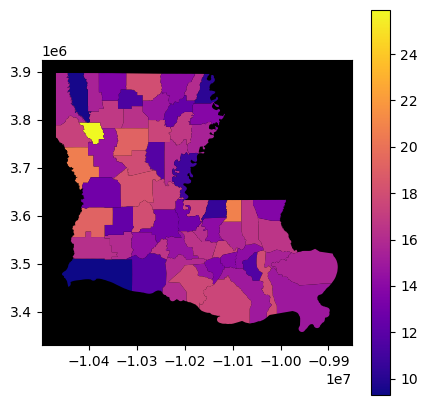

In [28]:
## PRELIMINARY PLOTS
### Note drop removes any rows with missing values in the column named 'B19013_001E'.
## sj_csa is a geopandas a table with geoid and geometry that can be displayed as a map
f, ax = plt.subplots(1,1,figsize=(5,5))
louisiana.dropna(subset=['pct_food_insecure'], axis=0).plot('pct_food_insecure', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

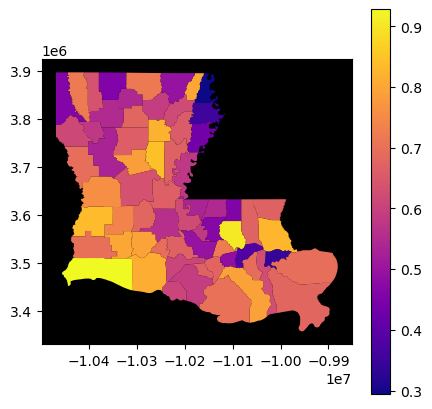

In [29]:
f, ax = plt.subplots(1,1,figsize=(5,5))
louisiana.dropna(subset=['pct_black'], axis=0).plot('pct_white', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

In [30]:
# So beautiful ^^^

# K Means

In [31]:
variables = california.columns

In [32]:
variables

Index(['County', 'County_FIPS', 'FEI', 'GEOID', 'NAME', 'SVI', 'State',
       'county', 'edu_attainment_less_hs', 'edu_attainment_total',
       'fast_food_per_1000', 'geometry', 'income_gini', 'median_h_value',
       'median_hh_income', 'pct_black', 'pct_diabetes', 'pct_food_insecure',
       'pct_less_hs', 'pct_limited_access', 'pct_obese', 'pct_white', 'state',
       'total_fast_food', 'total_pop', 'total_pop_black', 'total_pop_white'],
      dtype='object')

In [33]:
# credit https://gis.cdc.gov/grasp/diabetes/diabetesatlas-sdoh.html and census

In [34]:
cluster_vars = {
    'SVI' : "Social Vulnerability Index", # computed based on factors like socioeconomic status, household characteristics, racial and ethnic minority status, or housing type and transportation. https://www.atsdr.cdc.gov/placeandhealth/svi/at-a-glance_svi.html
    'fast_food_per_1000': "Number of Fast Food Restaurants per 1000 people", # fast food restaurants per 1000 people 
    #'median_h_value', "Median House Value",
    'median_hh_income': "Median Household Income",
    #'pct_black', "Percentage of Black"
    'pct_diabetes': "percentage of population obese",
    #'pct_food_insecure', "Food Insecure (%)",
    'pct_less_hs' : "Did not Complete Highschool (%)",
    #'pct_limited_access' : "percentage of population with limited access",
    'pct_obese' : "percentage of population that is obsese",
    #'pct_white' : "percentage of population that is white"
}
cluster_variables = list(cluster_vars.keys()) 

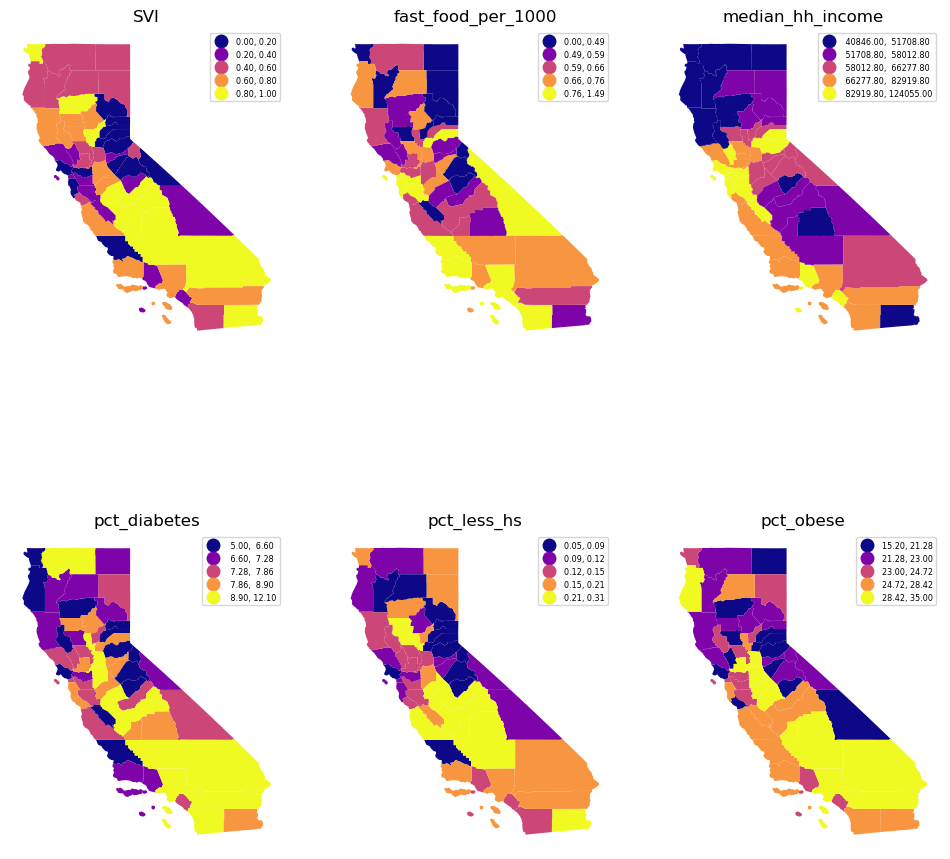

In [35]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    california.plot(column=col, ax=ax, scheme='Quantiles',
            linewidth=0, cmap='plasma',legend=True,legend_kwds={'fontsize':'xx-small'})
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

### Correlations

#### Elbow method

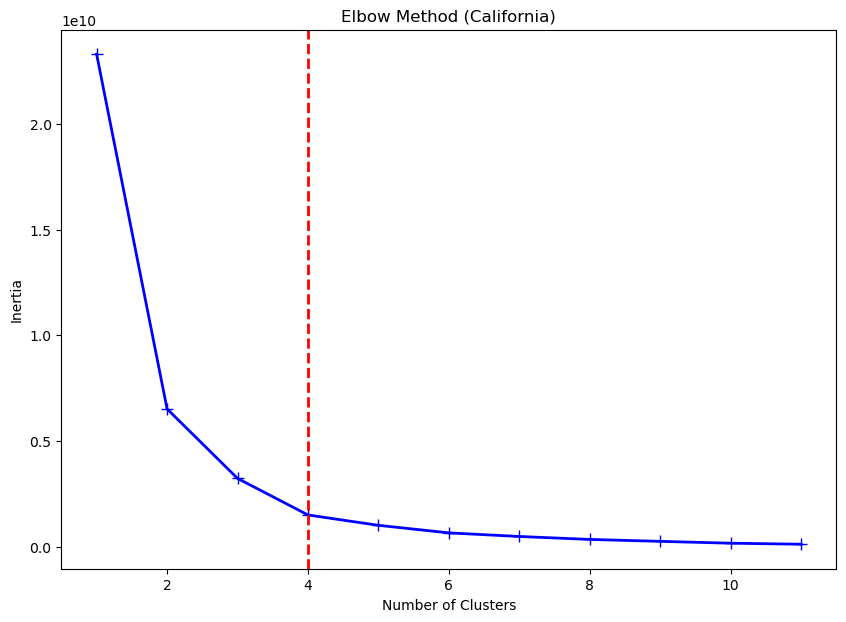

In [36]:
import sklearn.cluster as cluster
db_Short = california[cluster_variables]
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(db_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
mycenters = pandas.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters
# Using elbow method to select the correct number of clusters

_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
_ = plt.title('Elbow Method (California)', fontsize = 12)
_ = plt.xlabel('Number of Clusters',fontsize = 10)
_ = plt.ylabel('Inertia',fontsize = 10)

n_clusters = 4

_ = plt.axvline(x = n_clusters, linewidth = 2, color = 'red', linestyle = '--')
plt.savefig('ElbowMethodCalifornia.png')
_ = plt.show()


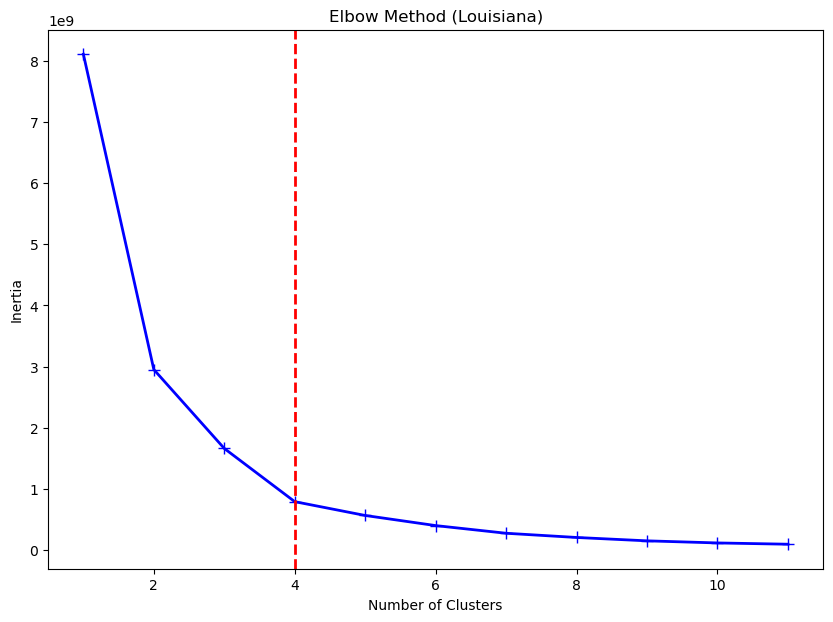

In [37]:
db_Short = louisiana[cluster_variables]
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(db_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
mycenters = pandas.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters
# Using elbow method to select the correct number of clusters

_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
_ = plt.title('Elbow Method (Louisiana)', fontsize = 12)
_ = plt.xlabel('Number of Clusters',fontsize = 10)
_ = plt.ylabel('Inertia',fontsize = 10)

n_clusters = 4

_ = plt.axvline(x = n_clusters, linewidth = 2, color = 'red', linestyle = '--')
plt.savefig('ElbowMethodLouisiana.png')
_ = plt.show()


#### Silouete Scores

In [38]:
import sklearn

In [39]:
df_Short = california[cluster_variables]

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=200).fit(df_Short) for k in range(2,13)]
silhouette_scores = [sklearn.metrics.silhouette_score(df_Short, model.labels_) for model in kmeans_per_k[0:]]
for i in range(len(silhouette_scores) - 2):
    print("Silhouette score for k(clusters) =" + " " + str(i + 2) + " " + "is " + str(silhouette_scores[i]))

Silhouette score for k(clusters) = 2 is 0.6636492153473855
Silhouette score for k(clusters) = 3 is 0.6126995289340785
Silhouette score for k(clusters) = 4 is 0.5775611019349877
Silhouette score for k(clusters) = 5 is 0.563071307076185
Silhouette score for k(clusters) = 6 is 0.5548122919486623
Silhouette score for k(clusters) = 7 is 0.5490049154860371
Silhouette score for k(clusters) = 8 is 0.5676634782542106
Silhouette score for k(clusters) = 9 is 0.5892722767605719
Silhouette score for k(clusters) = 10 is 0.6024055871181503


In [41]:
silhouette_scores

[0.6636492153473855,
 0.6126995289340785,
 0.5775611019349877,
 0.563071307076185,
 0.5548122919486623,
 0.5490049154860371,
 0.5676634782542106,
 0.5892722767605719,
 0.6024055871181503,
 0.6016068547030495,
 0.6255401622420136]

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


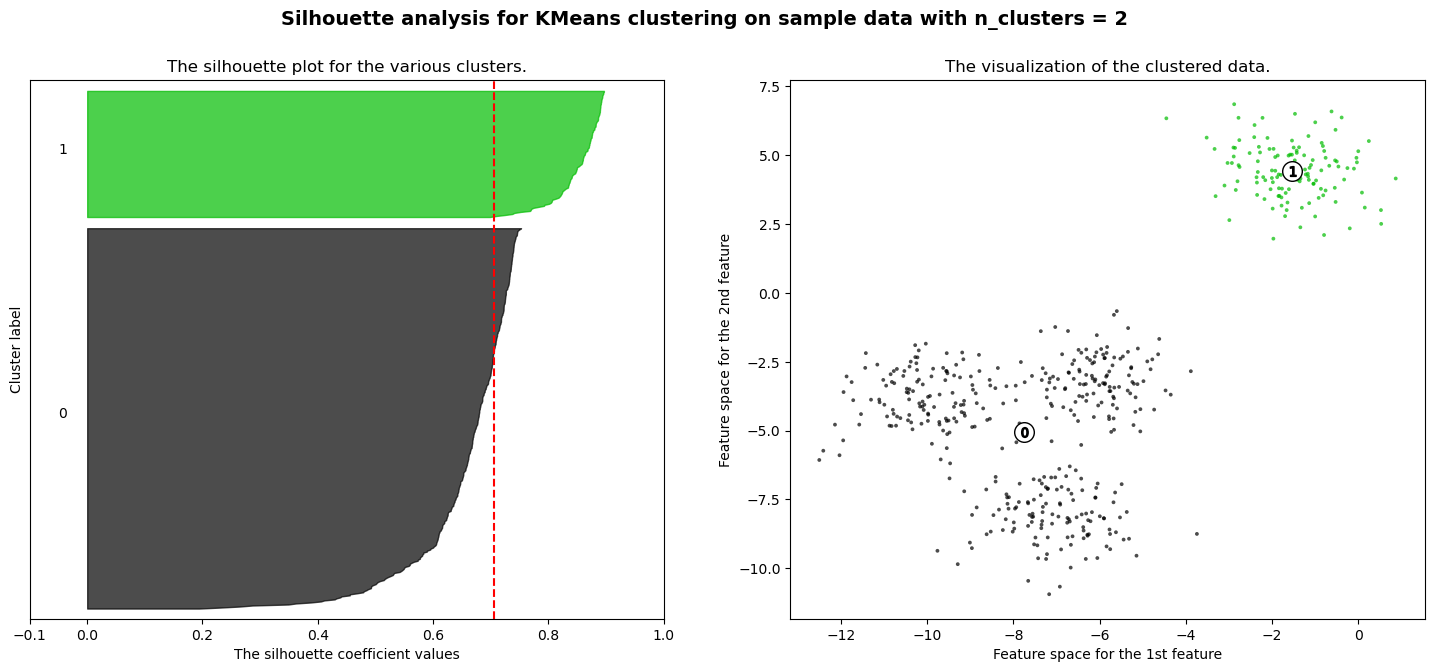

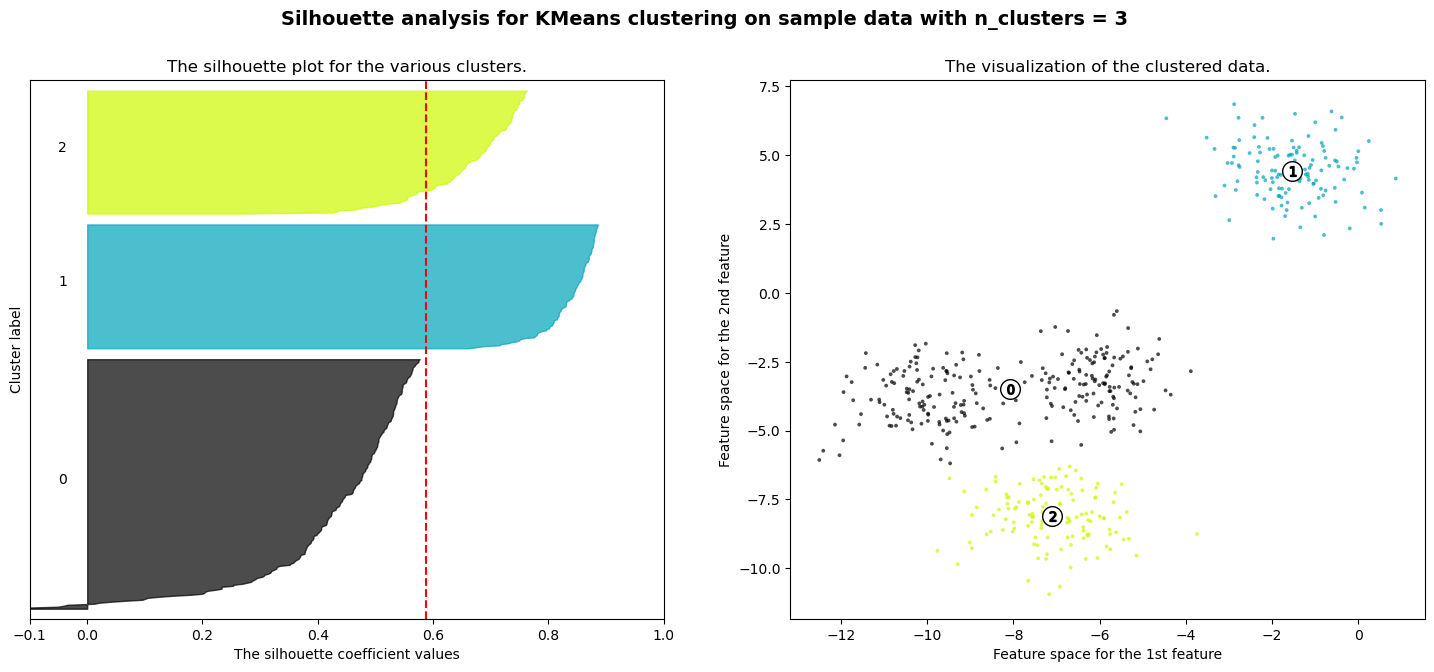

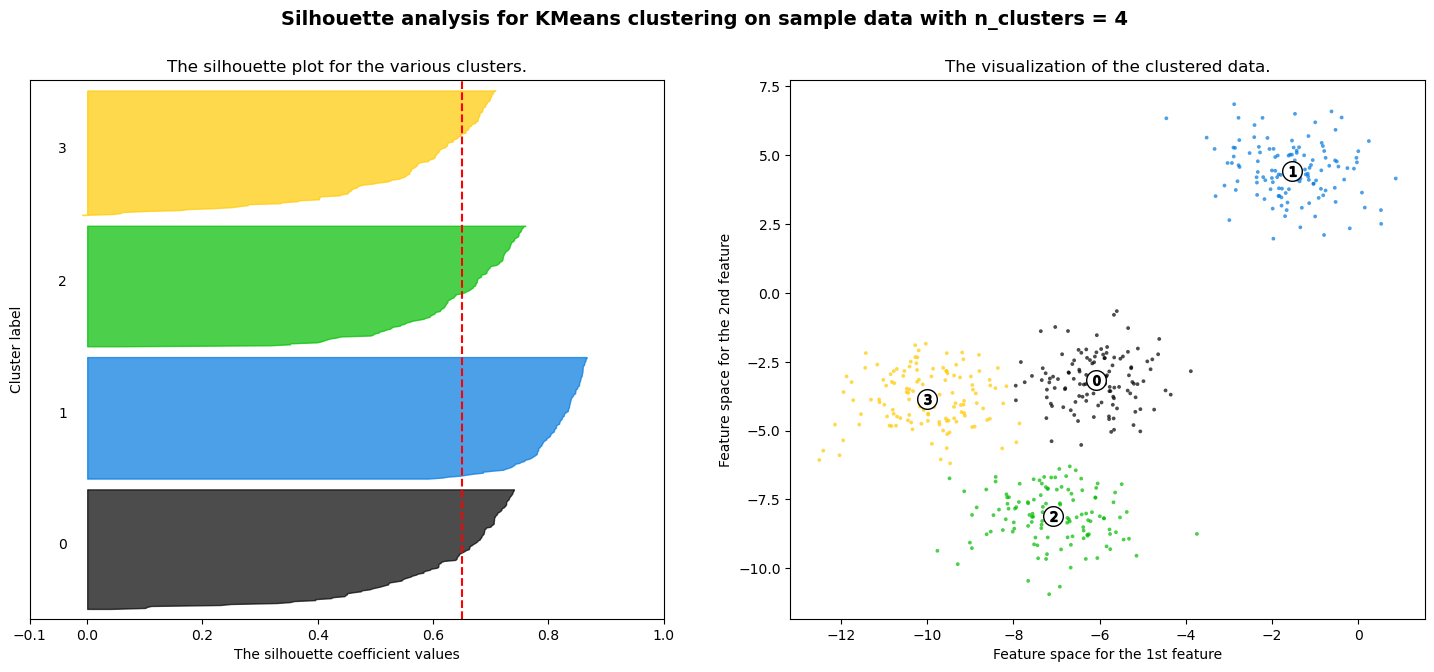

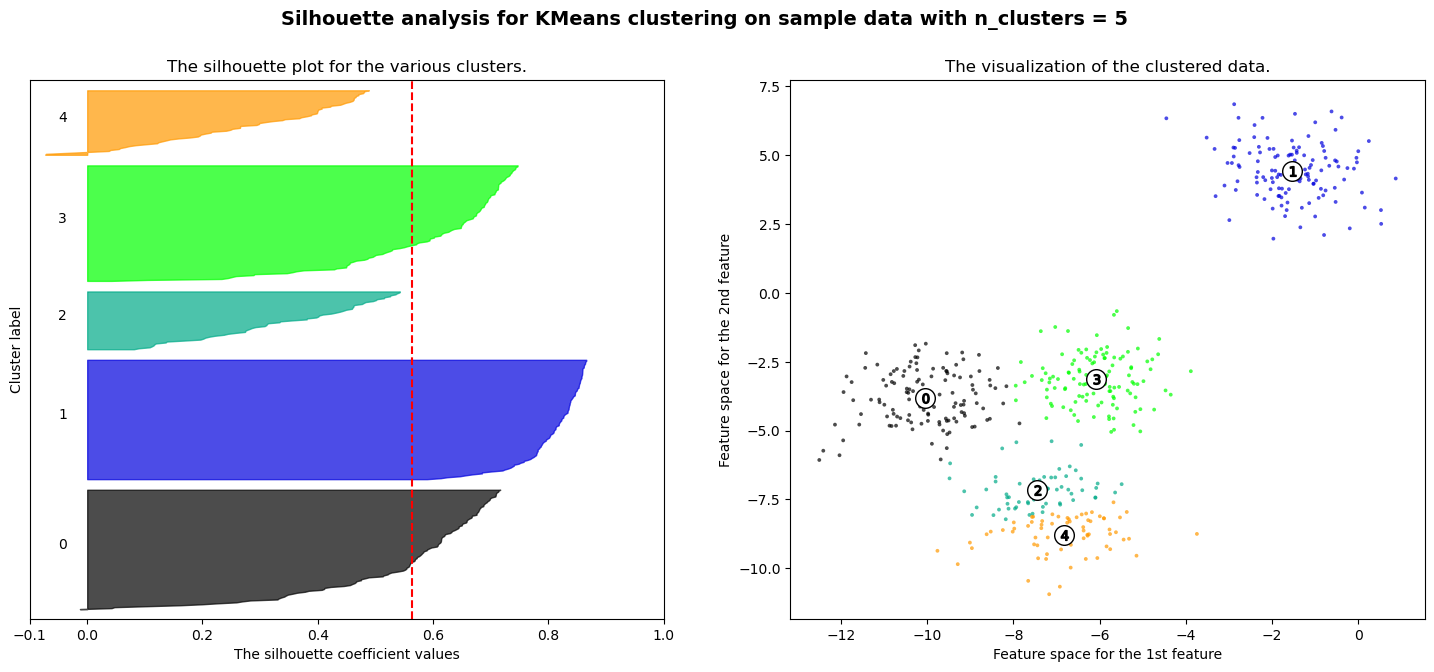

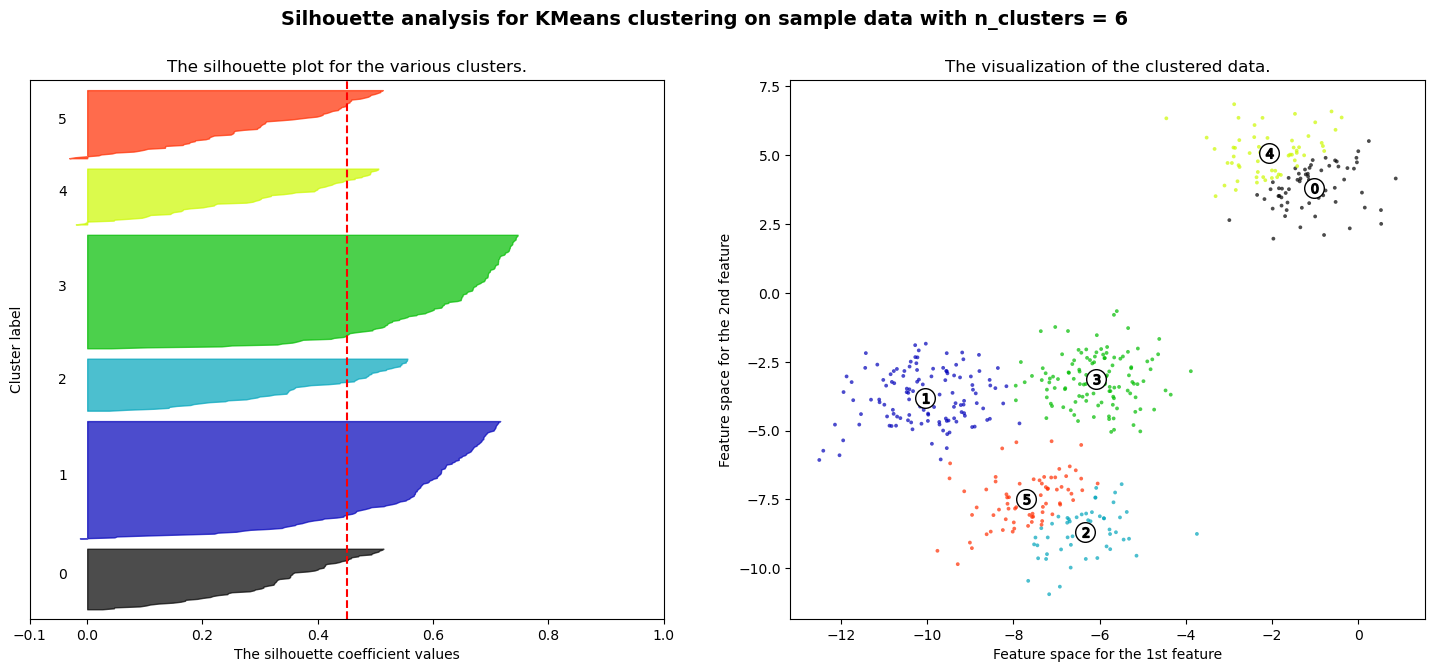

In [42]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Correlations

In [43]:
combined_df = pandas.concat([louisiana, california], ignore_index=True)

In [ ]:
cluster_variables = 

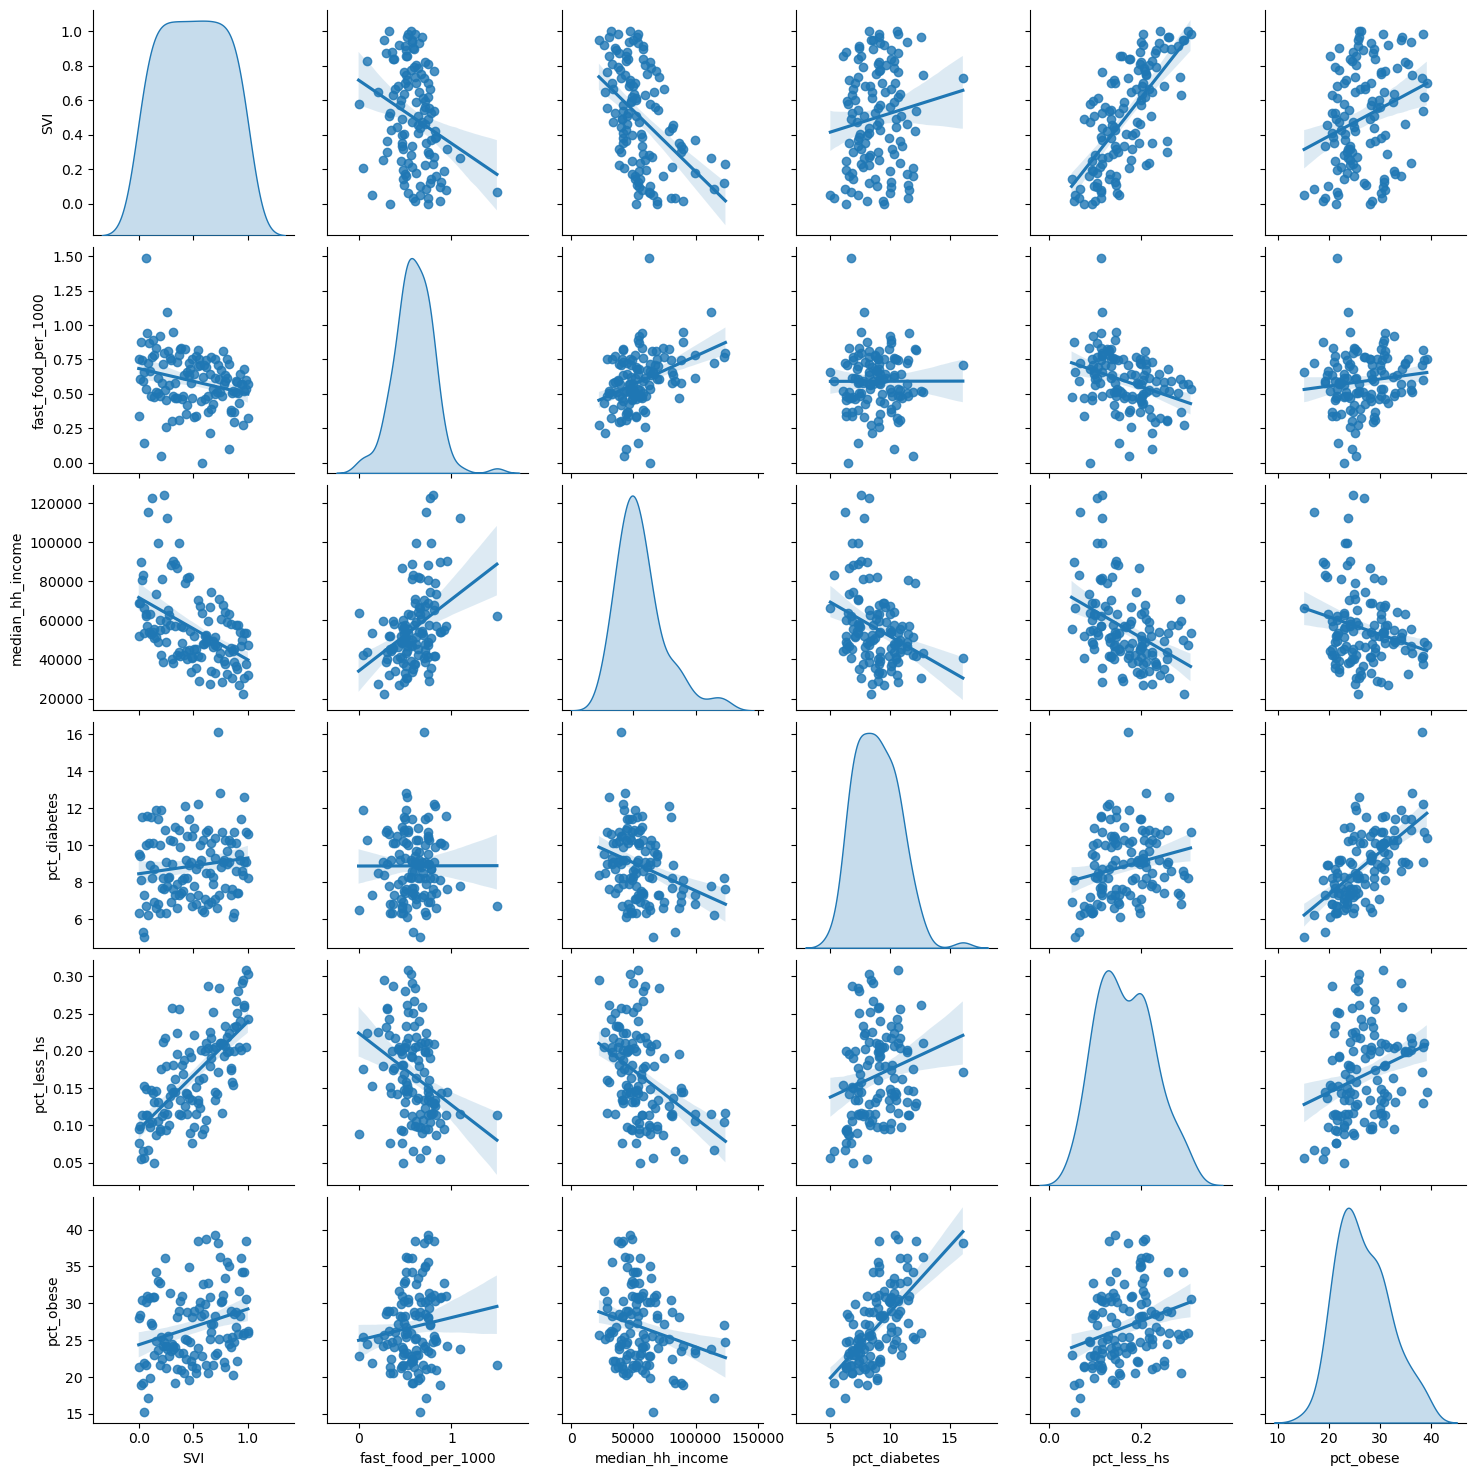

In [44]:
_=seaborn.pairplot(combined_df[cluster_variables], kind='reg', diag_kind='kde')

plt.show()

In [1]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = numpy.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


grid = seaborn.PairGrid(combined_df[cluster_variables])
# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(seaborn.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
plt.savefig('PairGrid.png')
plt.show()

NameError: name 'seaborn' is not defined